In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [ ]:
atp_w151_raw_data_csv = pd.read_csv('ATP W151.csv')

## 🐍 Project Summary: Strategic Social Justice Messaging in Pandas

This project delivers actionable political guidance by identifying the **Optimal Messaging Strategy for a Progressive Social Justice Initiative** focused on **Immigration and Public Resources**. The entire analysis is executed in Python, leveraging the power of the Pandas library for data transformation, quality control, and feature engineering.

---

### **Analytical Framework & Data Selection**

| Variable Type | Python Role | Key Variables |
| :--- | :--- | :--- |
| **Dependent Variable (The Effect)** | **Feature Engineering** target. | **Social Justice Support Index** (A composite score derived by combining four key attitude variables related to immigrant eligibility for public assistance and impact on public resources). |
| **Independent Variables (The Factors)** | **Segmentation** variables used for `groupby()` and comparative analysis. | **Demographics & Politics:** Income (`F_INC_SDT1`), Education (`F_EDUCCAT`), Religion (`F_RELIG`), and Ideology (`F_IDEO`). |


In [103]:
atp_w151_raw_data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9201 entries, 0 to 9200
Columns: 140 entries, QKEY to WEIGHT_W149_W151
dtypes: float64(27), int64(111), object(2)
memory usage: 9.8+ MB


In [104]:
atp_w151_raw_data_csv.dtypes

QKEY                      int64
INTERVIEW_START_W151     object
INTERVIEW_END_W151       object
DEVICE_TYPE_W151          int64
SVYMODE_W151              int64
                         ...   
F_INTFREQ                 int64
F_VOLSUM                  int64
F_INC_TIER2             float64
WEIGHT_W151             float64
WEIGHT_W149_W151        float64
Length: 140, dtype: object

### **Pandas Workflow & Quality Control (QC)**

The raw survey data underwent a targeted cleaning process to ensure analytical integrity:

1.  **Data Isolation:** The original $\sim 140$ column DataFrame was trimmed to a dedicated **$\mathbf{8}$-column $\text{DataFrame}$ (`analysis_df`)** using Pandas column indexing (`df[['col1', 'col2']]`).
2.  **System Missing Value Imputation (QC):** The pervasive **System Missing Code ($\mathbf{99}$)**—representing "Don't Know" or "Refused"—was identified from the codebook. This code was explicitly converted to **$\text{Python}$'s $\mathbf{np.nan}$** across all 8 columns using the powerful $\mathbf{\text{df.replace()}}$ method. This ensures that missing data is properly handled before building the final support index, demonstrating a core data quality skill.

In [105]:
key_cols = [
    'QKEY',
    'IMMSER_LGL_W151',
    'IMMSER_ILGL_W151',
    'LGIMPCT_PUBRES_W151',
    'ILLIMPCT_PUBRES_W151',
    'F_RELIG',
    'F_EDUCCAT',
    'F_INC_SDT1',
    'F_IDEO'
]

analysis_df = atp_w151_raw_data_csv[key_cols].copy()

## ⚖️ Feature Engineering: Recoding for Scale Alignment

The **Recoding Process** is essential to ensure that when we sum the four index questions, a **high number always means high support for the Social Justice Initiative**.

**The Goal:** Align all variables so that: $\mathbf{1 = \text{Least Progressive Support}}$ and **$\mathbf{\text{Highest Code} = \text{Most Progressive Support}}$**.

---

### **1. 2-Point Inversion (Eligibility Questions)**

This step inverts the original codes ($\mathbf{1 \rightarrow 2}$ and $\mathbf{2 \rightarrow 1}$) for the two questions where the progressive answer was $\mathbf{1}$ ("Yes").

| Variable | Focus | Original Code Map | New Code Map |
| :--- | :--- | :--- | :--- |
| $\text{IMMSER\_LGL\_W151}$ | Legal Assistance | $\{1: \text{Yes}, 2: \text{No}\}$ | $\mathbf{1 \rightarrow 2}$; $\mathbf{2 \rightarrow 1}$ |
| $\text{IMMSER\_ILGL\_W151}$ | Illegal Assistance | $\{1: \text{Yes}, 2: \text{No}\}$ | $\mathbf{1 \rightarrow 2}$; $\mathbf{2 \rightarrow 1}$ |



### **2. 3-Point Remapping (Public Resources Impact Questions)**

This step remaps the codes for the two questions that originally used a 3-point scale. This ensures the most progressive answer ("Making things better") is assigned the highest score ($\mathbf{3}$).

| Variable | Focus | Original Code Map | New Code Map |
| :--- | :--- | :--- | :--- |
| $\text{LGIMPCT\_PUBRES\_W151}$ | Legal Impact | $\{1: \text{Better}, 2: \text{Worse}, 3: \text{Neutral}\}$ | $\mathbf{1 \rightarrow 3}$; $\mathbf{2 \rightarrow 1}$; $\mathbf{3 \rightarrow 2}$ |
| $\text{ILLIMPCT\_PUBRES\_W151}$ | Illegal Impact | $\{1: \text{Better}, 2: \text{Worse}, 3: \text{Neutral}\}$ | $\mathbf{1 \rightarrow 3}$; $\mathbf{2 \rightarrow 1}$; $\mathbf{3 \rightarrow 2}$ |

In [106]:
# converting the 2pt scale

columns_to_invert_2pt = ['IMMSER_LGL_W151', 'IMMSER_ILGL_W151']
inversion_map_2pt = {1:2, 2:1}

analysis_df[columns_to_invert_2pt] = analysis_df[columns_to_invert_2pt].replace(inversion_map_2pt)

In [107]:
# converting the 3pt scale
columns_to_invert_3pt = ['LGIMPCT_PUBRES_W151', 'ILLIMPCT_PUBRES_W151']
inversion_map_3pt = {1:3, 2:1, 3:2}

analysis_df[columns_to_invert_3pt] = analysis_df[columns_to_invert_3pt].replace(inversion_map_3pt)

In [108]:
# updating 99 to nan
analysis_df[key_cols] = analysis_df[key_cols].replace(99, np.nan)

In [109]:
# making the social impact index column
index_columns = [
    'IMMSER_LGL_W151',
    'IMMSER_ILGL_W151',
    'LGIMPCT_PUBRES_W151',
    'ILLIMPCT_PUBRES_W151'
]

analysis_df['sj_support_index'] = analysis_df[index_columns].sum(axis=1)

print(analysis_df['sj_support_index'].describe())

count    9201.000000
mean        6.186175
std         1.494922
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: sj_support_index, dtype: float64


In [110]:
# sorting by Ideology
analysis_df.groupby('F_IDEO')['sj_support_index'].mean()

F_IDEO
1.0    5.394417
2.0    5.597696
3.0    6.175617
4.0    6.790401
5.0    7.546307
Name: sj_support_index, dtype: float64

### 🔑 Key Takeaway: Targeting the Middle

The numbers show that **Moderates** are the most important group we can actually win over.

* **Average Score:** $\mathbf{6.18}$ (on a 4-10 scale).
* **The Plan:** This score means they're not against us, but they're not with us either. The goal is to craft a **carefully framed message** that pushes them into the supportive range (7.0 or higher).
* **Don't Waste Effort:** We shouldn't spend money trying to persuade the **Liberals ($\mathbf{7.55}$)**—they're already sold. Resources should focus entirely on moving the Moderates.

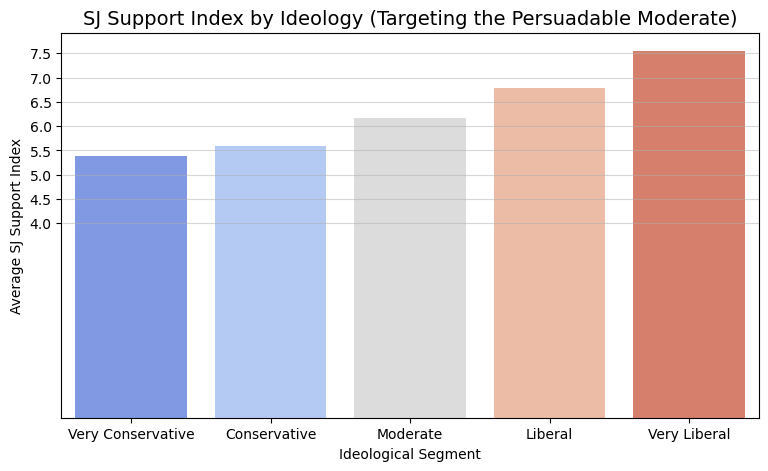

In [111]:
ideo_map = {1: 'Very Conservative', 2: 'Conservative', 3: 'Moderate', 4: 'Liberal', 5: 'Very Liberal'}
analysis_df['F_IDEO_LABEL'] = analysis_df['F_IDEO'].map(ideo_map)

ideology = analysis_df.groupby('F_IDEO_LABEL')['sj_support_index'].mean().sort_values()
ideology = ideology.rename('Avg Support Index (4-10)')

plt.figure(figsize=(9,5))
sns.barplot(x=ideology.index, y=ideology.values, palette='coolwarm')
plt.title('SJ Support Index by Ideology (Targeting the Persuadable Moderate)', fontsize=14)
plt.xlabel('Ideological Segment')
plt.ylabel('Average SJ Support Index')
plt.yticks(np.arange(4,8,0.5))
plt.grid(axis='y', alpha=0.5)
plt.show()

In [112]:
# sorting by income
analysis_df.groupby('F_INC_SDT1')['sj_support_index'].mean()

F_INC_SDT1
1.0    6.267736
2.0    6.235772
3.0    6.248908
4.0    6.105344
5.0    6.138486
6.0    6.080371
7.0    6.133333
8.0    6.166102
9.0    6.250888
Name: sj_support_index, dtype: float64

## 💰 Strategic Insight 2: Income Segmentation

The numbers show that support for the initiative is **flat** across all income levels—everyone scores about the same.

### 🔑 Key Takeaway for the Strategist

* **Income Doesn't Matter:** We don't need to waste time or money splitting our audience by how much money they make. **Income is not what's driving support** for this initiative.
* **Simple Focus:** This means the **Moderates** we decided to target based on ideology can be messaged **equally** whether they are low-income or high-income. Don't overcomplicate the ad buys.

In [113]:
# sorting by education
analysis_df.groupby('F_EDUCCAT')['sj_support_index'].mean()

F_EDUCCAT
1.0    6.370686
2.0    6.022826
3.0    5.994344
Name: sj_support_index, dtype: float64

## 🎓 Strategic Insight 3: Education Segmentation

The scores show a small difference based on education, but not a huge deal:

| F\_EDUCCAT Code | Education Label | Average $\mathbf{SJ\_Support\_Index}$ (4-10) |
| :---: | :--- | :---: |
| 1.0 | **College graduate+** (High) | $\mathbf{6.37}$ |
| 2.0 | Some College | $6.02$ |
| 3.0 | H.S. graduate or less (Low) | $5.99$ |

### 🔑 Key Takeaway for the Strategist

* **Education is a Bonus:** College grads support the initiative best ($\mathbf{6.37}$), but since the scores are close across the board (only about a 0.4 point difference), education shouldn't be your main focus.
* **Smart Filter:** Target the **Moderates** first (your main group). If you have extra budget, use **College Grad** as a simple filter *within* the Moderate group to get the highest probability of conversion.

In [114]:
# segmenting by religion
analysis_df.groupby('F_RELIG')['sj_support_index'].mean()

F_RELIG
1.0     5.881801
2.0     6.056108
3.0     5.940171
4.0     6.210526
5.0     6.486702
6.0     6.863636
7.0     6.871429
8.0     6.984375
9.0     6.886323
10.0    6.818182
11.0    6.511364
12.0    6.378672
Name: sj_support_index, dtype: float64

### 🔑 Key Takeaway: Religion Divides the Audience

The $\mathbf{1.10}$-point gap in the scores is a big deal, meaning we have to run **two very different strategies** based on religion:

* **Go All In (High Support, $\mathbf{\sim 6.8}$ and up):** Voters who identify as **Secular or Non-Traditional** (like Hindu, Atheist, etc.) are already on our side. The money here should go straight to **mobilization** using direct, values-based appeals. They are a high-return investment.

* **Be Careful (Low Support, $\mathbf{\sim 6.0}$ and below):** Traditional Christian voters (Protestant, Catholic, Mormon) are where we see the most resistance. We have two options:
    1.  **Avoid the topic entirely.**
    2.  If we must message them, use **neutral, economic language** (e.g., "fiscal health," "job growth") and avoid all social or moral arguments.

* **Actionable Strategy:** Do not try to win over the resistant Christian groups. **Focus all mobilization budget on secular and non-Christian voters** where our support is already strong.